In [253]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [254]:
#import packages
path = "virginwines_listings.csv"
virgin = pd.read_csv(path, sep = ",")
virgin.head()

,name,year,abv,size,grape type,country,wine_type,style,at its best,wine maker,price per bottle,num_review,rating,url
0,Modernist Pinot Noir 2020,2020,12.50%,75cl,Pinot Noir,Germany,Red,Light Reds,Now - End 2024,Dirk Roth,11.99,234,3.7 out of 5 stars from 234 customers,https://www.virginwines.co.uk/wine/Z3955810263...
1,Brio Pinot Grigio 2021,2021,12.50%,75cl,Pinot Grigio,Italy,White,Fruity Whites,Now - End 2024,Ivano Emiliani,10.99,9,4.4 out of 5 stars from 9 customers,https://www.virginwines.co.uk/wine/Z4194810141...
2,Ripper Shiraz 2021,2021,14.00%,75cl,Shiraz / Syrah,Australia,Red,Full Bodied Reds,Now - End 2024,David King,10.99,1138,4.3 out of 5 stars from 1138 customers,https://www.virginwines.co.uk/wine/Z4040910141...
3,Senti Prosecco Extra Dry NV,NV,11.00%,75cl,Prosecco (Glera),Italy,Sparkling,Prosecco,Within 1 year of purchase,Umberto Menini,12.99,3167,4.3 out of 5 stars from 3167 customers,https://www.virginwines.co.uk/wine/Z3725610246...
4,Billy Bosch Highwire Chenin Blanc 2021,2021,12.00%,75cl,Chenin Blanc,South Africa,White,Dry and Crisp Whites,Now - End 2024,Willie Stofberg,10.99,1096,4.2 out of 5 stars from 1096 customers,https://www.virginwines.co.uk/wine/Z3964010141...


In [255]:
virgin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              699 non-null    object 
 1   year              699 non-null    object 
 2   abv               699 non-null    object 
 3   size              699 non-null    object 
 4   grape type        699 non-null    object 
 5   country           699 non-null    object 
 6   wine_type         699 non-null    object 
 7   style             698 non-null    object 
 8   at its best       699 non-null    object 
 9   wine maker        690 non-null    object 
 10  price per bottle  699 non-null    float64
 11  num_review        699 non-null    int64  
 12  rating            699 non-null    object 
 13  url               699 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 76.6+ KB


In [256]:
virgin['year'] = virgin['year'].str.replace("NV","Non Vintage")
virgin['year'].unique()

array(['2020', '2021', 'Non Vintage', '2019', '2018', '2016', '2014',
       '2022', '2015', '2017', '2001', '2010', '2012', '2013', '2004',
       '2009'], dtype=object)

In [257]:
virgin['abv'] = virgin["abv"].apply(lambda x: x[0:-1])
virgin["abv"] = virgin["abv"].apply(pd.to_numeric, errors = "coerce")
virgin['abv'].unique()

array([12.5, 14. , 11. , 12. , 13.5, 13. , 15.5,  9.5, 15. , 14.5, 10.5,
       11.5,  0. ,  7. ,  7.5,  8. , 20.5, 18.5,  0.1,  0.5, 20. , 17.5,
        9. ,  5. , 16.5, 10. , 16. , 19. , 19.5])

In [258]:
virgin['size'] = virgin['size'].str.replace("Magnum1.5L",'150cl')
virgin['size'] = virgin['size'].apply(lambda x: x[0:-2])
virgin['size'] = virgin['size'].apply(pd.to_numeric, errors = "coerce")
virgin['size'].unique()

C:\Users\aparn\AppData\Local\Temp\ipykernel_15860\1874331495.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  virgin['size'] = virgin['size'].str.replace("Magnum1.5L",'150cl')


array([ 75. ,  37.5,  50. , 150. ])

In [259]:
virgin['country'] = virgin['country'].str.replace("England","United Kingdom")
virgin['country'].unique()

array(['Germany', 'Italy', 'Australia', 'South Africa', 'France', 'Chile',
       'New Zealand', 'Spain', 'USA', 'Austria', 'Portugal',
       'United Kingdom', 'Lebanon', 'Hungary', 'Greece', 'Argentina',
       'Romania', 'Canada', 'Turkey'], dtype=object)

In [260]:
#drop the un-relevant wine types

#replacing special char with alpha values
virgin.replace("Rosé", "Rose", inplace=True)

# take note of the required ones
selected_wines = ['Red', 'White', 'Rose', 'Sparkling', 'Fortified', 'Sherry', 'Low / Alcohol Free Wines']

# use .isin() to select only those rows that have the wines from the selected list
virgin1 = virgin[virgin['wine_type'].isin(selected_wines)]

virgin1["wine_type"].unique()


array(['Red', 'White', 'Sparkling', 'Rose', 'Low / Alcohol Free Wines',
       'Sherry', 'Fortified'], dtype=object)

In [261]:
virgin = virgin1
virgin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 698
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   year              686 non-null    object 
 2   abv               686 non-null    float64
 3   size              686 non-null    float64
 4   grape type        686 non-null    object 
 5   country           686 non-null    object 
 6   wine_type         686 non-null    object 
 7   style             685 non-null    object 
 8   at its best       686 non-null    object 
 9   wine maker        677 non-null    object 
 10  price per bottle  686 non-null    float64
 11  num_review        686 non-null    int64  
 12  rating            686 non-null    object 
 13  url               686 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 80.4+ KB


Plot a histogram of the `age` column of the dataset. Do the values look reasonable to you? Do the same for `salary`.

In [262]:
# rename column to price for ease of use
virgin.rename(columns={"price per bottle" : "price"}, inplace=True)

In [263]:
virgin['rating']= virgin.loc[:,"rating"].str.split('\s+').str[0]
virgin['rating']
virgin['rating'] = virgin['rating'].apply(pd.to_numeric, errors = "coerce")

In [264]:
dups = virgin.duplicated() #checks each row of the dataset and returns TRUE or FALSE depending on whether it is a duplicate
print(dups.any()) #returns TRUE if there is any value in dups that is equal to TRUE
print(virgin[dups]) #returns the problematic row

False
Empty DataFrame
Columns: [name, year, abv, size, grape type, country, wine_type, style, at its best, wine maker, price, num_review, rating, url]
Index: []


In [265]:
virgin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 0 to 698
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         686 non-null    object 
 1   year         686 non-null    object 
 2   abv          686 non-null    float64
 3   size         686 non-null    float64
 4   grape type   686 non-null    object 
 5   country      686 non-null    object 
 6   wine_type    686 non-null    object 
 7   style        685 non-null    object 
 8   at its best  686 non-null    object 
 9   wine maker   677 non-null    object 
 10  price        686 non-null    float64
 11  num_review   686 non-null    int64  
 12  rating       686 non-null    float64
 13  url          686 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 80.4+ KB


Use the function `.unique()` to take a look at the values taken on by `education`, `years_since_promotion`, and `exit`.

In [266]:
virgin.isna().any()

name           False
year           False
abv            False
size           False
grape type     False
country        False
wine_type      False
style           True
at its best    False
wine maker      True
price          False
num_review     False
rating         False
url            False
dtype: bool

In [267]:
virgin.isna().sum()

name           0
year           0
abv            0
size           0
grape type     0
country        0
wine_type      0
style          1
at its best    0
wine maker     9
price          0
num_review     0
rating         0
url            0
dtype: int64

In [268]:
virgin.nunique()

name           686
year            15
abv             27
size             3
grape type      96
country         18
wine_type        7
style           22
at its best     33
wine maker     264
price           66
num_review     345
rating          28
url            686
dtype: int64

Use the function `.duplicated()` and conditioning to to detect if there are any duplicates.

array([3.7, 4.4, 4.3, 4.2, 4.6, 4.1, 4.5, 5. , 3.8, 3.9, 4. , 0. , 3.2,
       1. , 4.8, 2.2, 4.7, 3. , 3.5, 2.5, 2.9, 2.8, 3.4, 3.1, 3.6, 2.7,
       4.9, 2.3])

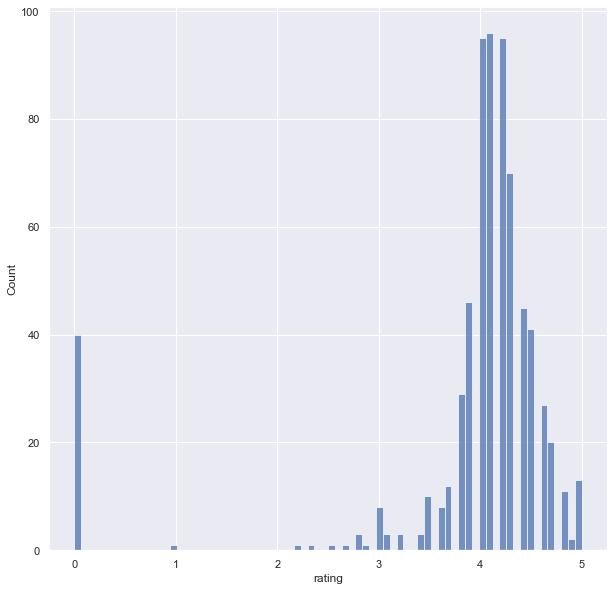

In [269]:
sns.set(rc={"figure.figsize":(10,10)})
sns.histplot(virgin["rating"])
virgin["rating"].unique()

Use the function `.drop_duplicates(inplace=True)` to obtain a new dataset with no duplicates.

array(['Red', 'White', 'Sparkling', 'Rose', 'Low / Alcohol Free Wines',
       'Sherry', 'Fortified'], dtype=object)

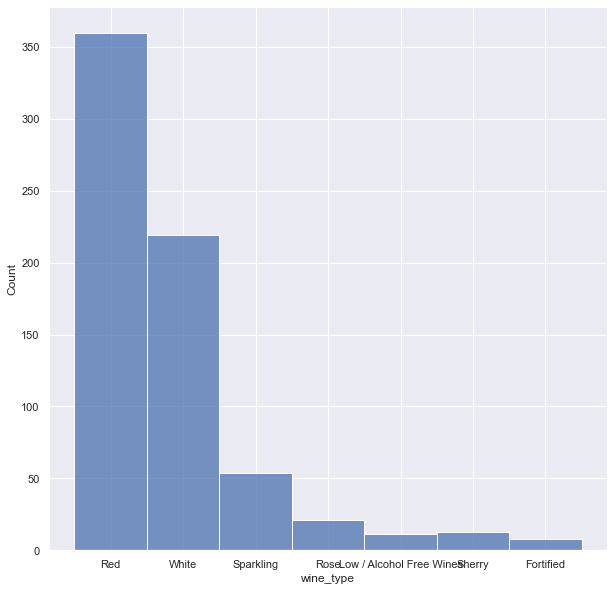

In [270]:
sns.set(rc={"figure.figsize":(10,10)})
sns.histplot(virgin["wine_type"])
virgin["wine_type"].unique()

array([ 75.,  50., 150.])

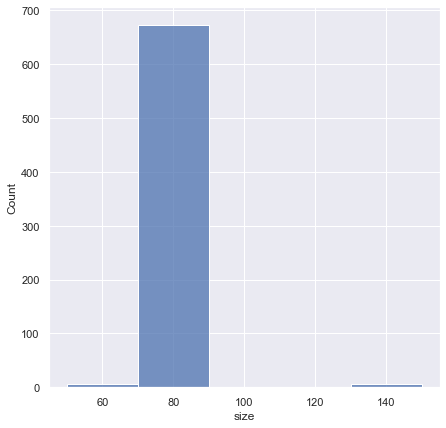

In [271]:
# Histogram plots for size
sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(virgin["size"], kde=False, bins=5)
virgin["size"].unique()

Drop any columns with only one value using `.drop(columns=['name1','name2'])`.

<AxesSubplot:xlabel='abv', ylabel='Count'>

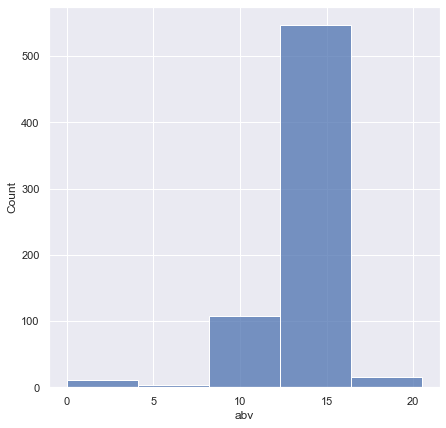

In [272]:
# Histogram plot of ABV

sns.set(rc={"figure.figsize":(7,7)})

sns.histplot(virgin["abv"], kde=False,bins=5)

<AxesSubplot:xlabel='year', ylabel='Count'>

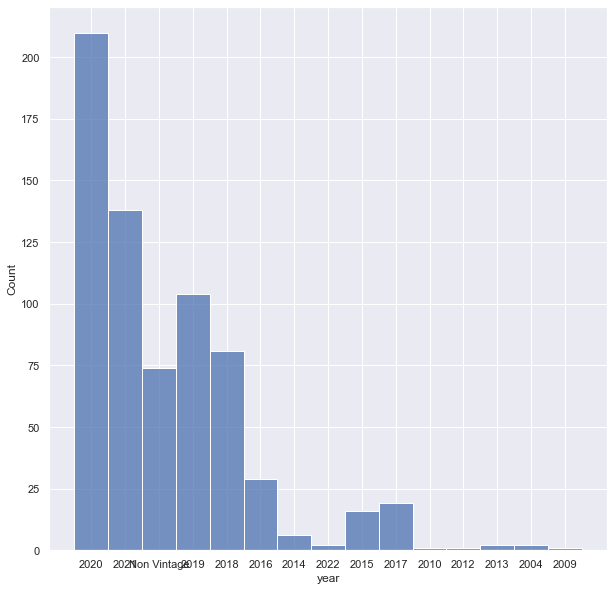

In [273]:
# Histogram plot of year

virgin["year"].isna().sum()/len(virgin["year"])*100
sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(virgin["year"], bins=10)

# As only 5% is missing, we will keep it as is and can use other column values for analysis 

In [274]:
virgin = virgin.reset_index()

In [275]:
year2 = virgin["year"].apply(pd.to_numeric, errors = "coerce")
# Feature Engineering

virgin2 = pd.DataFrame(year2)
virgin2.info()
virgin.loc[:, "age"] = 2022 - virgin2['year']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    612 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


In [276]:

# Creating a column with ratings >5
for i, num in enumerate(virgin["num_review"]):
    if num > 5:
        virgin.loc[i, "score"] = virgin.loc[i, "rating"]
    else:
        virgin.loc[i, "score"] = 0

In [277]:
virgin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        686 non-null    int64  
 1   name         686 non-null    object 
 2   year         686 non-null    object 
 3   abv          686 non-null    float64
 4   size         686 non-null    float64
 5   grape type   686 non-null    object 
 6   country      686 non-null    object 
 7   wine_type    686 non-null    object 
 8   style        685 non-null    object 
 9   at its best  686 non-null    object 
 10  wine maker   677 non-null    object 
 11  price        686 non-null    float64
 12  num_review   686 non-null    int64  
 13  rating       686 non-null    float64
 14  url          686 non-null    object 
 15  age          612 non-null    float64
 16  score        686 non-null    float64
dtypes: float64(6), int64(2), object(9)
memory usage: 91.2+ KB


In [278]:
# Impute size to most frequent value

impute = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
virgin[["size"]]=impute.fit_transform(virgin[["size"]])


# To scale size
for i, size in enumerate(virgin["size"]):
    virgin.loc[i, "scaledprice"] = virgin.loc[i, "price"] * 75 / size

virgin.loc[virgin["size"] != 75, ["size", "price", "scaledprice"]]

# Creating a new column log price as it is skewed
virgin.loc[:, "logprice"] = np.log10(virgin.loc[:,"scaledprice"])

In [279]:
# creating country codes
import pycountry

# create a dict f country name and their codes 
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3

virgin["countrycode"] = [countries.get(c, "unknown") for c in virgin["country"]]
virgin.head()

,index,name,year,abv,size,grape type,country,wine_type,style,at its best,wine maker,price,num_review,rating,url,age,score,scaledprice,logprice,countrycode
0,0,Modernist Pinot Noir 2020,2020,12.5,75.0,Pinot Noir,Germany,Red,Light Reds,Now - End 2024,Dirk Roth,11.99,234,3.7,https://www.virginwines.co.uk/wine/Z3955810263...,2.0,3.7,11.99,1.078819,DEU
1,1,Brio Pinot Grigio 2021,2021,12.5,75.0,Pinot Grigio,Italy,White,Fruity Whites,Now - End 2024,Ivano Emiliani,10.99,9,4.4,https://www.virginwines.co.uk/wine/Z4194810141...,1.0,4.4,10.99,1.040998,ITA
2,2,Ripper Shiraz 2021,2021,14.0,75.0,Shiraz / Syrah,Australia,Red,Full Bodied Reds,Now - End 2024,David King,10.99,1138,4.3,https://www.virginwines.co.uk/wine/Z4040910141...,1.0,4.3,10.99,1.040998,AUS
3,3,Senti Prosecco Extra Dry NV,Non Vintage,11.0,75.0,Prosecco (Glera),Italy,Sparkling,Prosecco,Within 1 year of purchase,Umberto Menini,12.99,3167,4.3,https://www.virginwines.co.uk/wine/Z3725610246...,NaN,4.3,12.99,1.113609,ITA
4,4,Billy Bosch Highwire Chenin Blanc 2021,2021,12.0,75.0,Chenin Blanc,South Africa,White,Dry and Crisp Whites,Now - End 2024,Willie Stofberg,10.99,1096,4.2,https://www.virginwines.co.uk/wine/Z3964010141...,1.0,4.2,10.99,1.040998,ZAF


<AxesSubplot:>

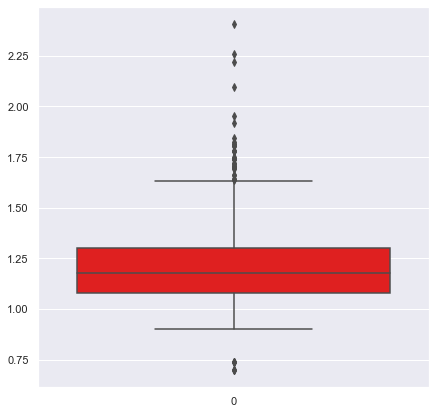

In [280]:
# price visualisation (log plot of price as the data is skewed)
sns.set(rc={"figure.figsize":(7,7)})

sns.boxplot(data=np.log10(virgin["scaledprice"]), color= "red")

<AxesSubplot:xlabel='Count', ylabel='country'>

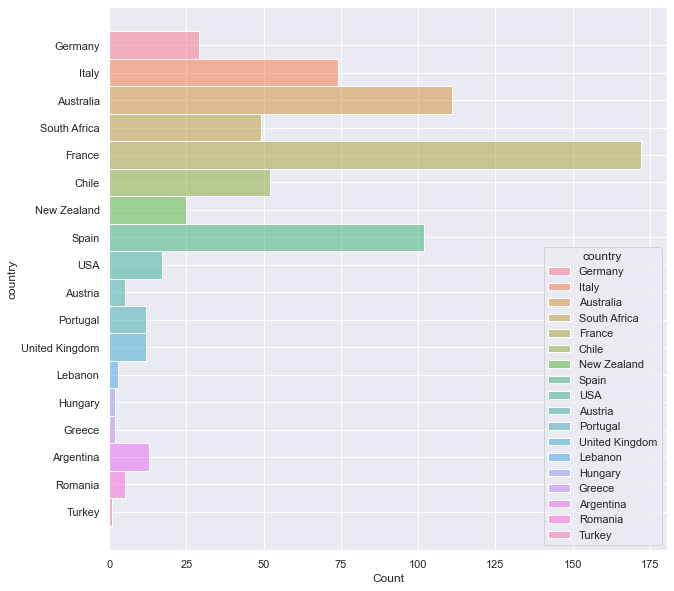

In [281]:
# Countries visualisation
sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(data=virgin, y="country", hue="country")

<AxesSubplot:xlabel='wine_type', ylabel='num_review'>

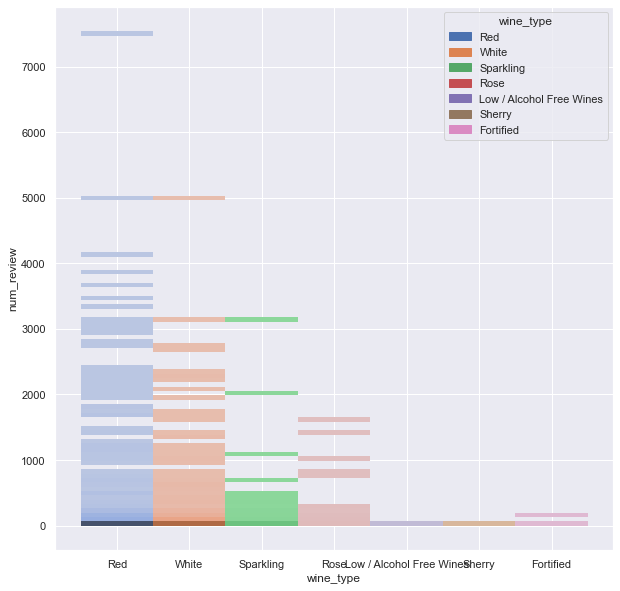

In [282]:
# Countries visualisation

sns.set(rc={"figure.figsize":(10,10)})

sns.histplot(data=virgin, x = "wine_type", y="num_review", hue="wine_type")

<AxesSubplot:xlabel='wine_type', ylabel='logprice'>

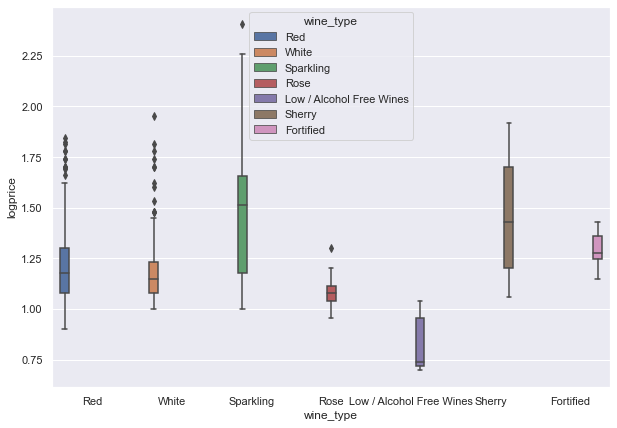

In [283]:
# plot wine type vs price

sns.set(rc={"figure.figsize":(10,7)})

sns.boxplot(
    data=virgin,
    x="wine_type", y="logprice", hue="wine_type"
)

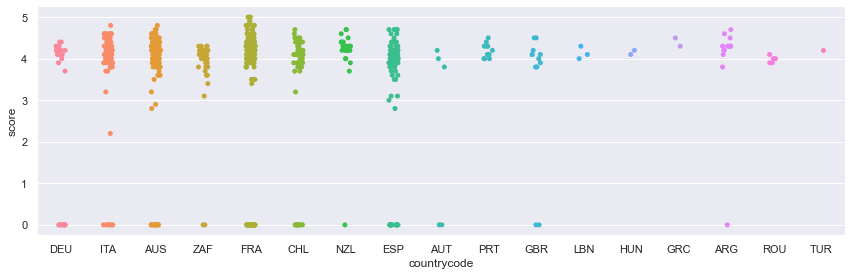

In [284]:
# plot country vs review ratings

sns.catplot(data=virgin.loc[virgin["countrycode"]!="unknown"], x="countrycode", y="score", height=4, aspect=3)

Text(0.5, 0, 'LogPrice')

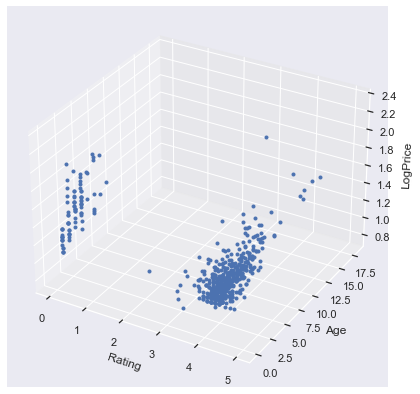

In [285]:
# Plot log price vs age and rating

from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(virgin["score"], virgin["age"], virgin["logprice"], '.')
ax.set_xlabel("Rating")
ax.set_ylabel("Age")
ax.set_zlabel("LogPrice")

In [286]:
virgin.head()

,index,name,year,abv,size,grape type,country,wine_type,style,at its best,wine maker,price,num_review,rating,url,age,score,scaledprice,logprice,countrycode
0,0,Modernist Pinot Noir 2020,2020,12.5,75.0,Pinot Noir,Germany,Red,Light Reds,Now - End 2024,Dirk Roth,11.99,234,3.7,https://www.virginwines.co.uk/wine/Z3955810263...,2.0,3.7,11.99,1.078819,DEU
1,1,Brio Pinot Grigio 2021,2021,12.5,75.0,Pinot Grigio,Italy,White,Fruity Whites,Now - End 2024,Ivano Emiliani,10.99,9,4.4,https://www.virginwines.co.uk/wine/Z4194810141...,1.0,4.4,10.99,1.040998,ITA
2,2,Ripper Shiraz 2021,2021,14.0,75.0,Shiraz / Syrah,Australia,Red,Full Bodied Reds,Now - End 2024,David King,10.99,1138,4.3,https://www.virginwines.co.uk/wine/Z4040910141...,1.0,4.3,10.99,1.040998,AUS
3,3,Senti Prosecco Extra Dry NV,Non Vintage,11.0,75.0,Prosecco (Glera),Italy,Sparkling,Prosecco,Within 1 year of purchase,Umberto Menini,12.99,3167,4.3,https://www.virginwines.co.uk/wine/Z3725610246...,NaN,4.3,12.99,1.113609,ITA
4,4,Billy Bosch Highwire Chenin Blanc 2021,2021,12.0,75.0,Chenin Blanc,South Africa,White,Dry and Crisp Whites,Now - End 2024,Willie Stofberg,10.99,1096,4.2,https://www.virginwines.co.uk/wine/Z3964010141...,1.0,4.2,10.99,1.040998,ZAF


In [287]:
virgin_to_merge = virgin[['name', 'wine_type', 'country', 'year','price','scaledprice', 'score', 'num_review', 'abv', 'size','age','logprice']]
virgin_to_merge.head(20)

,name,wine_type,country,year,price,scaledprice,score,num_review,abv,size,age,logprice
0,Modernist Pinot Noir 2020,Red,Germany,2020,11.99,11.99,3.7,234,12.5,75.0,2.0,1.078819
1,Brio Pinot Grigio 2021,White,Italy,2021,10.99,10.99,4.4,9,12.5,75.0,1.0,1.040998
2,Ripper Shiraz 2021,Red,Australia,2021,10.99,10.99,4.3,1138,14.0,75.0,1.0,1.040998
3,Senti Prosecco Extra Dry NV,Sparkling,Italy,Non Vintage,12.99,12.99,4.3,3167,11.0,75.0,NaN,1.113609
4,Billy Bosch Highwire Chenin Blanc 2021,White,South Africa,2021,10.99,10.99,4.2,1096,12.0,75.0,1.0,1.040998
5,The Black Pig McLaren Vale Shiraz 2019,Red,Australia,2019,13.99,13.99,4.6,3317,14.0,75.0,3.0,1.145818
6,Champagne Gremillet Brut Selection NV,Sparkling,France,Non Vintage,27.99,27.99,4.4,394,12.0,75.0,NaN,1.447003
7,El Nubarron Carmenere 2021,Red,Chile,2021,10.99,10.99,4.2,150,13.5,75.0,1.0,1.040998
8,Savvie Marlborough Sauvignon Blanc 2021,White,New Zealand,2021,14.99,14.99,4.4,24,13.0,75.0,1.0,1.175802
9,Jose Rose 2021,Rose,Spain,2021,8.99,8.99,4.1,150,12.0,75.0,1.0,0.953760


In [289]:
# rename column to size for ease of use
virgin_to_merge.rename(columns={'size' : 'size(cL)'}, inplace=True)
virgin_to_merge.head()

C:\Users\aparn\AppData\Local\Temp\ipykernel_15860\2349312985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  virgin_to_merge.rename(columns={'size' : 'size(cL)'}, inplace=True)


,name,wine_type,country,year,price,scaledprice,score,num_review,abv,size(cL),age,logprice
0,Modernist Pinot Noir 2020,Red,Germany,2020,11.99,11.99,3.7,234,12.5,75.0,2.0,1.078819
1,Brio Pinot Grigio 2021,White,Italy,2021,10.99,10.99,4.4,9,12.5,75.0,1.0,1.040998
2,Ripper Shiraz 2021,Red,Australia,2021,10.99,10.99,4.3,1138,14.0,75.0,1.0,1.040998
3,Senti Prosecco Extra Dry NV,Sparkling,Italy,Non Vintage,12.99,12.99,4.3,3167,11.0,75.0,NaN,1.113609
4,Billy Bosch Highwire Chenin Blanc 2021,White,South Africa,2021,10.99,10.99,4.2,1096,12.0,75.0,1.0,1.040998


In [290]:
virgin_to_merge.to_csv('virgin_to_merge.csv')